**Assignment 3- Part b2**

**Using pure Pytorch tensor datastructure to build a 3 layer neural network with auto differentiation primitive**

In [35]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

Prepare Data

In [36]:
# 3 Dimension non-linear input data

n = 200
d = 3
x = torch.rand(n,d)
weights_true = torch.tensor([[2, 1,-1],[3,0,-1]]).T
bias_true = torch.tensor([[0.5],[0.1]])

y_true = torch.matmul((x ** 2).float() , weights_true.float()) + torch.matmul(x.float() , weights_true.float()) + bias_true.T.float()
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

x: torch.Size([200, 3]), weights: torch.Size([3, 2]), bias: torch.Size([2, 1]), y: torch.Size([200, 2])


Visualizing the data generated using TSNE

In [37]:
from sklearn.manifold import TSNE
view = TSNE(n_components=2, n_jobs=5).fit_transform(x)
view.shape

(200, 2)

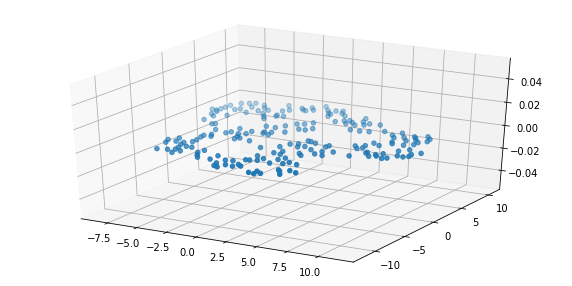

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#y_pred = y_pred.astype('int')
fig = plt.figure(figsize=(10,5))
tsne = fig.add_subplot(111, projection='3d')
tsne.scatter(*zip(*view))
plt.show()

In [39]:
import math
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 2)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 4)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(4.7883, grad_fn=<MseLossBackward>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [40]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(4.7883, grad_fn=<MseLossBackward>)
tensor(4.1270, grad_fn=<MseLossBackward>)


Running the training loop

In [41]:

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  tsne = fig.add_subplot(111, projection='3d')
  tsne.scatter(x[:, 0], x[:, 1], y[:, 0], label='underlying function')
  if y_pred is not None:
    tsne.scatter(x[:, 0], x[:, 1], y_pred[:, 0], label='our function')
  plt.legend()

tensor(4.1270, grad_fn=<MseLossBackward>)
tensor(3.6138, grad_fn=<MseLossBackward>)
tensor(3.2040, grad_fn=<MseLossBackward>)
tensor(2.8883, grad_fn=<MseLossBackward>)
tensor(2.6614, grad_fn=<MseLossBackward>)
tensor(2.5093, grad_fn=<MseLossBackward>)
tensor(2.4101, grad_fn=<MseLossBackward>)
tensor(2.3421, grad_fn=<MseLossBackward>)
tensor(2.2896, grad_fn=<MseLossBackward>)
tensor(2.2437, grad_fn=<MseLossBackward>)
tensor(2.1998, grad_fn=<MseLossBackward>)
tensor(2.1558, grad_fn=<MseLossBackward>)
tensor(2.1105, grad_fn=<MseLossBackward>)
tensor(2.0635, grad_fn=<MseLossBackward>)
tensor(2.0144, grad_fn=<MseLossBackward>)
tensor(1.9631, grad_fn=<MseLossBackward>)
tensor(1.9094, grad_fn=<MseLossBackward>)
tensor(1.8532, grad_fn=<MseLossBackward>)
tensor(1.7942, grad_fn=<MseLossBackward>)
tensor(1.7326, grad_fn=<MseLossBackward>)
tensor(1.6683, grad_fn=<MseLossBackward>)
tensor(1.6014, grad_fn=<MseLossBackward>)
tensor(1.5325, grad_fn=<MseLossBackward>)
tensor(1.4623, grad_fn=<MseLossBac

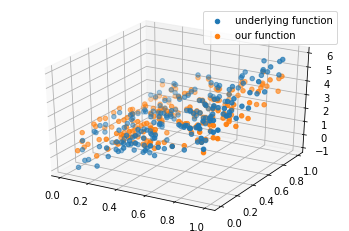

In [42]:
from typing import Callable

def torch_fit(x, y, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x_tensor).detach())